<a href="https://colab.research.google.com/github/HikmahAlBaity/Wisdom/blob/main/None_Linear__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [22]:
df = pd.read_csv("/content/FuelConsumptionCo2 (1).csv")
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


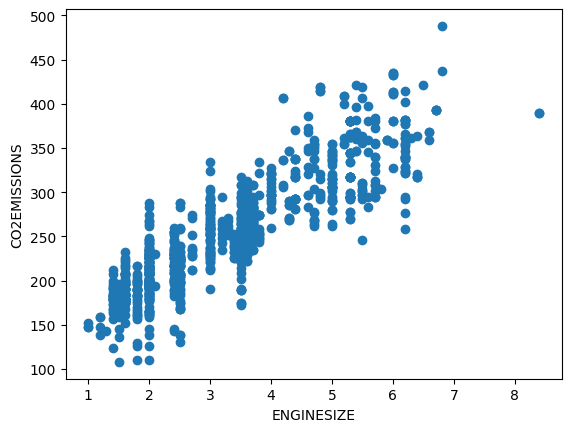

In [23]:
plt.scatter(x = 'ENGINESIZE', y= 'CO2EMISSIONS', data = df)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

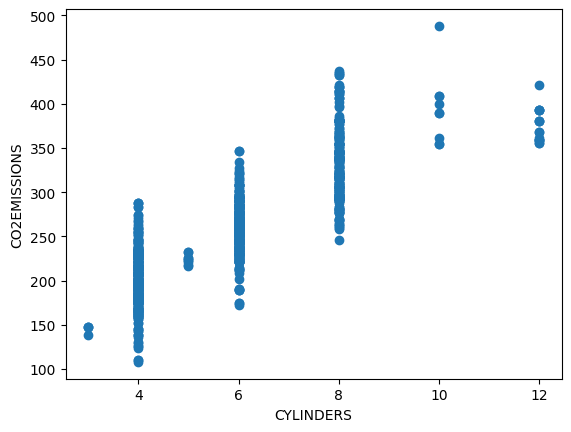

In [32]:
plt.scatter(x = 'CYLINDERS', y= 'CO2EMISSIONS', data = df)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [24]:
import numpy as np
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

# Polynomial Regression

$$y = b + \theta\_1  x + \theta\_2 x^2$$

clf = linear_model.LinearRegression(): Initializes the linear regression model.

clf.fit(X, y): Trains the model using the sample data X and y.

clf.predict(X): Predicts the values based on the trained model.

clf.coef_ and clf.intercept_: These attributes give you the coefficients and intercept of the linear equation.

In [29]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
# convert DF to array

# training the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2) # how sensitive the curve line towards the distribution data (higher degree, > sensitive )
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# prediction
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

# evaluation
from sklearn.metrics import r2_score

print ('The R2 score is :', (r2_score(test_y, test_y_))*100)
print ('The MSE is :', np.mean((test_y_ - test_y)**2))

The R2 score is : 75.85951464652861
The MSE is : 1040.3033915844114


# Scatter plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

# Define range for x values
XX = np.arange(0.0, 10.0, 0.1)

np.arange(0.0, 10.0, 0.1): Creates an array of values from 0.0 to 10.0 (not inclusive) with a step of 0.1. This will be used as the x-values for plotting the polynomial regression line.


# Compute polynomial regression line
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)

# Plot polynomial regression line
plt.plot(XX, yy, '-r')

# Label the axes
plt.xlabel("Engine size")
plt.ylabel("Emission")


Text(0, 0.5, 'Emission')

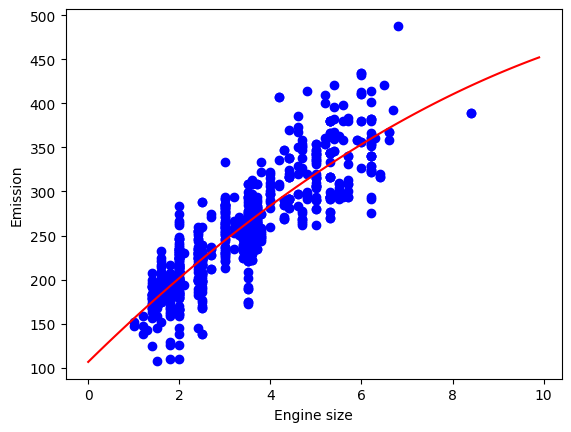

In [26]:
# equation for polynomial degree 2:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [30]:
# change degree to 4
poly4 = PolynomialFeatures(degree=4) # how sensitive the curve line towards the distribution data (higher degree, > sensitive )
train_x_poly4 = poly4.fit_transform(train_x)
clf4 = linear_model.LinearRegression()
train_y_ = clf4.fit(train_x_poly4, train_y)

# prediction
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly4 = poly4.fit_transform(test_x)
test_y_ = clf4.predict(test_x_poly4)

# evaluation
from sklearn.metrics import r2_score

print ('The R2 score is :', (r2_score(test_y, test_y_))*100)
print ('The MSE is :', np.mean((test_y_ - test_y)**2))

The R2 score is : 75.97412903473321
The MSE is : 1035.3642308746012


Text(0, 0.5, 'Emission')

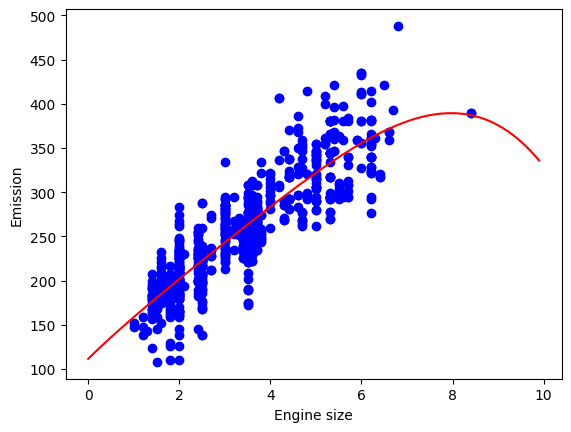

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [49]:
#CYLINDERS VS CO2 EMISSIONS

# convert DF to array
# training the model
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2) # how sensitive the curve line towards the distribution data (higher degree, > sensitive )
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# prediction
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

# evaluation
from sklearn.metrics import r2_score

print ('The R2 score is :', (r2_score(test_y, test_y_))*100)
print ('The MSE is :', np.mean((test_y_ - test_y)**2))

The R2 score is : 71.94968955130363
The MSE is : 1208.7923116499512


Text(0, 0.5, 'Emission')

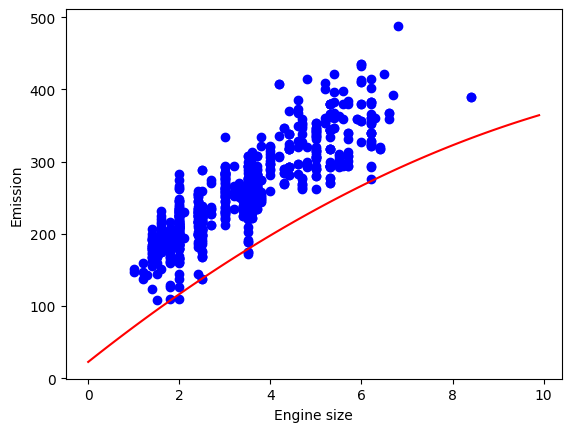

In [51]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [70]:
#FUELCONSUMPTION_CITY  VS CO2 EMISSIONS

# convert DF to array
# training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2) # how sensitive the curve line towards the distribution data (higher degree, > sensitive )
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

# evaluation
from sklearn.metrics import r2_score

print ('The R2 score is :', (r2_score(test_y, test_y_))*100)
print ('The MSE is :', np.mean((test_y_ - test_y)**2))

The R2 score is : 86.08546890801885
The MSE is : 599.6289500953712


Text(0, 0.5, 'Emission')

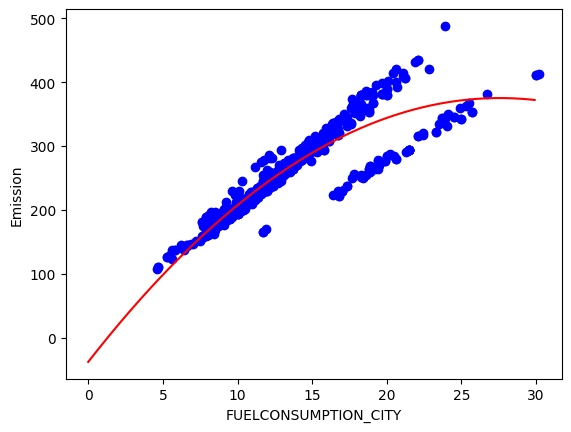

In [71]:
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 30.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

In [44]:
%whos


Variable             Type                  Data/Info
----------------------------------------------------
LinearRegression     ABCMeta               <class 'sklearn.linear_mo<...>._base.LinearRegression'>
PolynomialFeatures   type                  <class 'sklearn.preproces<...>mial.PolynomialFeatures'>
XX                   ndarray               100: 100 elems, type `float64`, 800 bytes
clf                  LinearRegression      LinearRegression()
clf4                 LinearRegression      LinearRegression()
data_root            str                   https://github.com/ageron/data/raw/main/
df                   DataFrame                   MODELYEAR   MAKE   <...>n[1067 rows x 13 columns]
linear_model         module                <module 'sklearn.linear_m<...>inear_model/__init__.py'>
msk                  ndarray               1067: 1067 elems, type `bool`, 1067 bytes
np                   module                <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd                   

In [53]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


poly1 = PolynomialFeatures(degree=4) # how sensitive the curve line towards the distribution data (higher degree, > sensitive )
train_x_poly1 = poly1.fit_transform(train_x)
clf1 = linear_model.LinearRegression()
train_y_ = clf1.fit(train_x_poly, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly1 = poly1.fit_transform(test_x)
test_y_ = clf1.predict(test_x_poly)

# evaluation
from sklearn.metrics import r2_score

print ('The R2 score is :', (r2_score(test_y, test_y_))*100)
print ('The MSE is :', np.mean((test_y_ - test_y)**2))

The R2 score is : 71.94968955130363
The MSE is : 1208.7923116499512


IndexError: index 3 is out of bounds for axis 0 with size 3

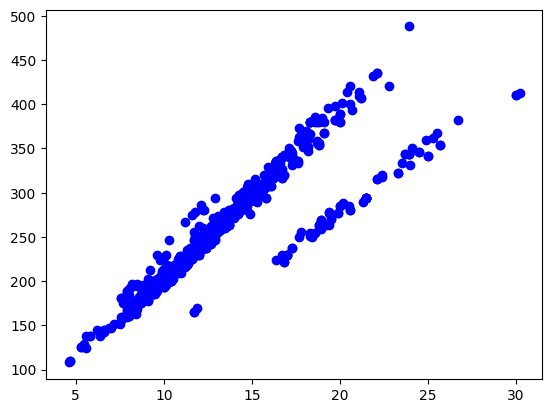

In [55]:
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf1.intercept_[0]+ clf1.coef_[0][1]*XX + clf1.coef_[0][2]*np.power(XX, 2) + clf1.coef_[0][3]*np.power(XX, 3) + clf1.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

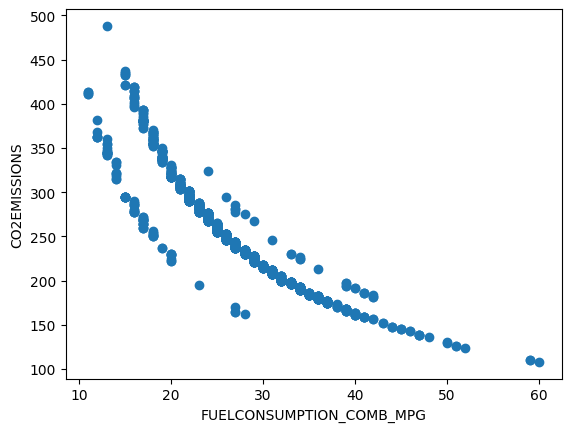

In [56]:
plt.scatter(x = 'FUELCONSUMPTION_COMB_MPG', y= 'CO2EMISSIONS', data = df)
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [76]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


poly3 = PolynomialFeatures(degree=4) # how sensitive the curve line towards the distribution data (higher degree, > sensitive )
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y_ = clf3.fit(train_x_poly3, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly3 = poly3.fit_transform(test_x)
test_y_ = clf3.predict(test_x_poly3)

# evaluation
from sklearn.metrics import r2_score

print ('The R2 score is :', (r2_score(test_y, test_y_))*100)
print ('The MSE is :', np.mean((test_y_ - test_y)**2))

The R2 score is : 86.6806032871333
The MSE is : 573.9823939480563


Text(0, 0.5, 'Emission')

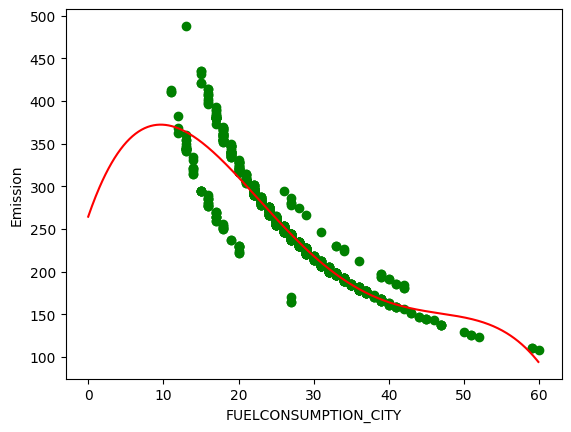

In [72]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='GREEN')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3) + clf3.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

In [77]:
poly5 = PolynomialFeatures(degree=5) # how sensitive the curve line towards the distribution data (higher degree, > sensitive )
train_x_poly5 = poly5.fit_transform(train_x)
clf5 = linear_model.LinearRegression()
train_y_ = clf5.fit(train_x_poly5, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly5 = poly5.fit_transform(test_x)
test_y_ = clf5.predict(test_x_poly5)

# evaluation
from sklearn.metrics import r2_score

print ('The R2 score is :', (r2_score(test_y, test_y_))*100)
print ('The MSE is :', np.mean((test_y_ - test_y)**2))

The R2 score is : 86.98997501381966
The MSE is : 560.6504144199032


Text(0, 0.5, 'Emission')

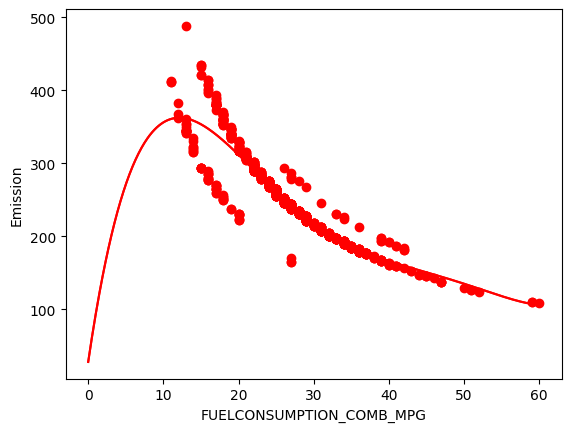

In [78]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='RED')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4)+ clf5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

# Multiple Non-Linear

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [104]:
# Multiple Non-Linear
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE','CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

polyH = PolynomialFeatures(degree=2)

train_x_polyH = polyH.fit_transform(train_x)

clfH = linear_model.LinearRegression()

train_y_ = clfH.fit(train_x_polyH, train_y)

#the default is degree 2 #the higher the degree the sensitive the distribution of the data
#sensitive mean following the distribution of the data

#predicting model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE','CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_polyH = polyH.fit_transform(test_x)

test_y_ = clfH.predict(test_x_polyH)

#Evaluation

print('The R2 score is:', (r2_score(test_y, test_y_))*100)

print('The MSE is:', np.mean((test_y_ - test_y)**2)*100)

The R2 score is: 93.71402988597977
The MSE is: 27088.585557676644


In [105]:
# Multiple Linear
#FUELCONSUMPTION_CITY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_HWY ,FUELCONSUMPTION_COMB_MPG , CYLINDERS and ENGINESIZE vs CO2EMISSIONS

regr2 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS' ]])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#training
regr2.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction
test_y_hat = regr2.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean((test_y  - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y  - test_y_hat))))*100), 2))

The R2 is:  89.12
The MSE is:  46876.72
The MAE is:  1432.02


In [84]:
# COMPARING BETWEEN SIMPLE LINEAR WITH NON - LINEAR REGRESSION

# SIMPLE
#FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS

#training
regr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr1.fit (train_x, train_y)

# prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual prediction

test_y_hat = regr1.predict(test_x) # the prediction

#evaluation
print ('The R2 is: ', round(((r2_score(test_y, test_y_hat))*100), 2))
print ('The MSE is: ', round((((np.mean(( test_y - test_y_hat)**2)))*100), 2))
print ('The MAE is: ', round((((np.mean(np.absolute(test_y - test_y_hat))))*100), 2))


The R2 is:  82.48
The MSE is:  75505.81
The MAE is:  1837.23


Text(0, 0.5, 'Emission')

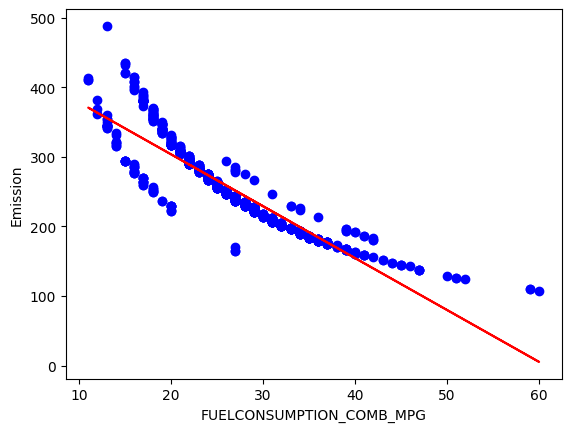

In [87]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")



Text(0, 0.5, 'Emission')

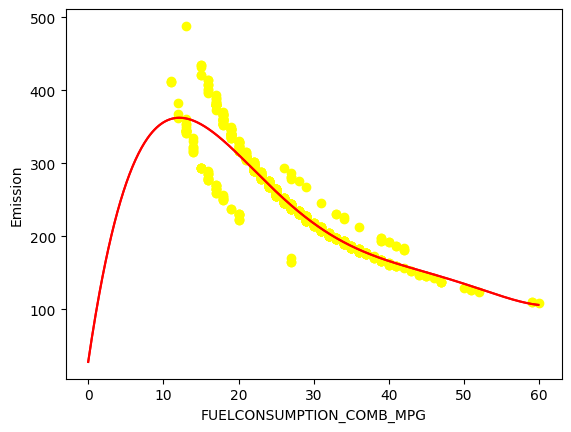

In [91]:
#Non-Linear
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='yellow')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4)+ clf5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

<function matplotlib.pyplot.show(close=None, block=None)>

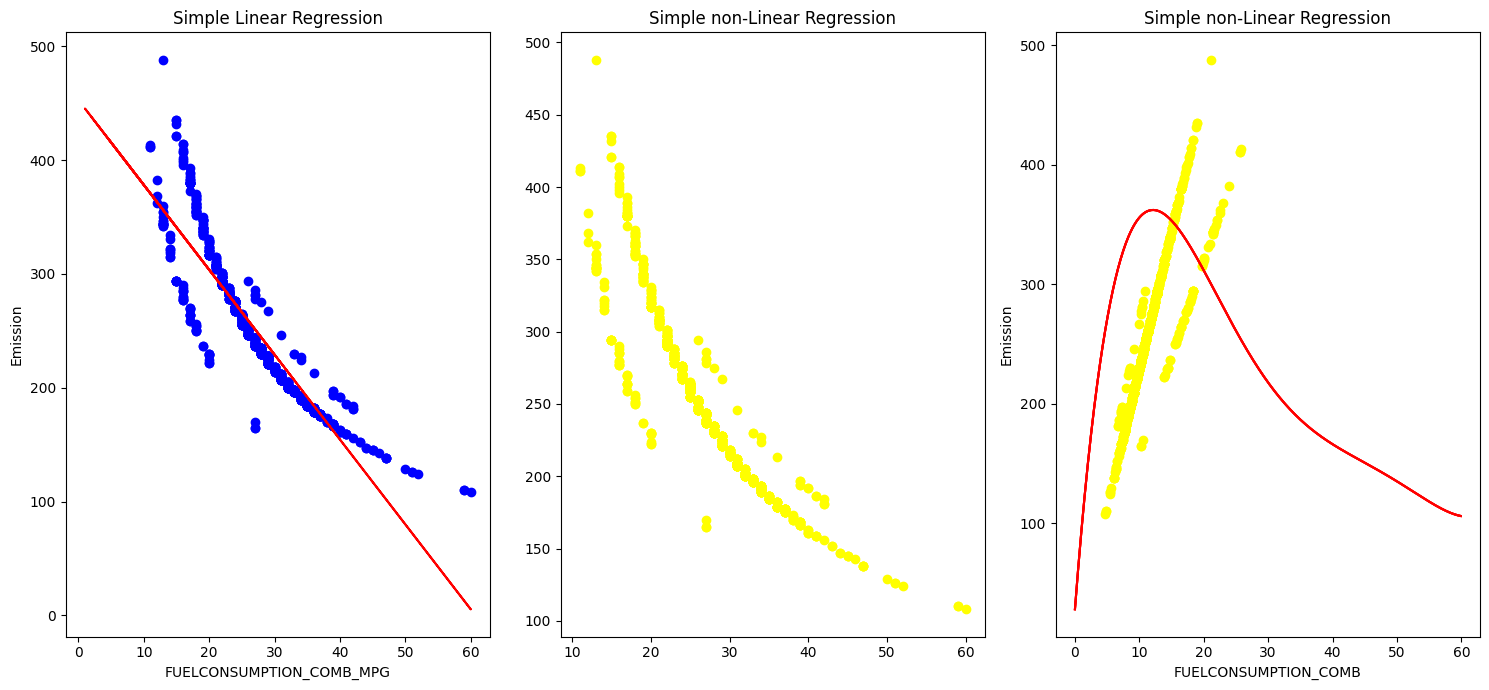

In [107]:
fig, (plot1, plot2, plot3) = plt.subplots(1, 3, figsize=(15, 7)) # use for combining graph in one output


plot1.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
plot1.plot(train_x, regr1.coef_[0][0]*train_x + regr1.intercept_[0], '-r') #-r is for the colour of the line, can be change to -g, you will see green
plot1.set_xlabel("FUELCONSUMPTION_COMB_MPG")
plot1.set_ylabel("Emission")
plot1.set_title('Simple Linear Regression')


plot2.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='yellow')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4)+ clf5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plot2.set_title('Simple non-Linear Regression')


plot3.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='yellow')
XX = np.arange(0.0, 60.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2) + clf5.coef_[0][3]*np.power(XX, 3) + clf5.coef_[0][4]*np.power(XX, 4)+ clf5.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plot3.set_title('Simple non-Linear Regression')

plt.tight_layout()
plt.show


